## Кластерный анализ

In [96]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

from sklearn import metrics
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [97]:
df = pd.read_csv('Econom_Cities_data.csv', sep=';', index_col='City')
df

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5
Buenos_Aires,1971,56.1,12.5
Cairo,-9999,37.1,-9999.0
Caracas,2041,61.0,10.9
Chicago,1924,73.9,61.9


Данные описывают экономические условия в 48 городах мира.

```Work``` - взвешенное среднее числа рабочих часов, сосчитанное по 12 профессиям.

```Price``` - индекс цен 112 товаров и услуг, включая арендную плату.

```Salary``` - индекс заработной платы за час работы, сосчитанный по 12 профессиям.

Значения для Джакарты и Каира, очевидно, выбросы, поэтому удалим их.

In [98]:
df = df.drop(index=["Cairo", "Jakarta"])

Значения по переменной ```Work``` сильно больше двух других, поэтому стандартизуем данные, чтобы они вносили равномерный вклад при подсчете расстояния.

In [99]:
stand = preprocessing.StandardScaler()
stand.fit(df)

X = stand.transform(df)
X = pd.DataFrame(X, index=df.index, columns=df.columns)
X.head()

,Work,Price,Salary
City,,,
Amsterdam,-0.962166,-0.212712,0.386095
Athens,-0.509827,-0.770489,-0.373488
Bogota,1.577891,-1.522069,-1.145323
Bombay,0.997969,-1.881316,-1.398517
Brussels,-0.996961,0.174896,0.447351


### Иерархический кластерный анализ

In [100]:
link = linkage(X, 'ward', 'euclidean')

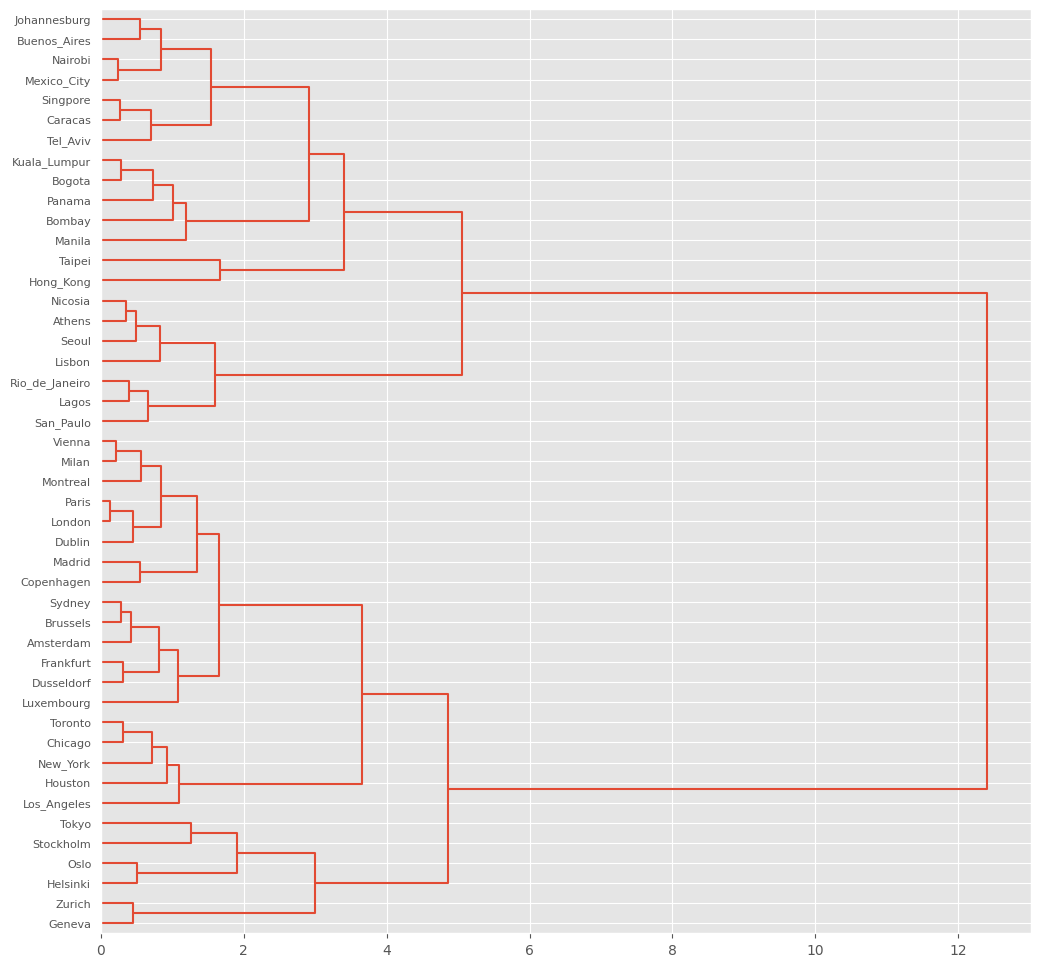

In [101]:
fig = plt.figure(figsize=(12,12))
dn = dendrogram(link,
                labels=X.index.tolist(),
                leaf_font_size = 8, 
                color_threshold=-1,
                orientation = "right",
                leaf_rotation=0.)

Text(0, 0.5, 'Расстояние')

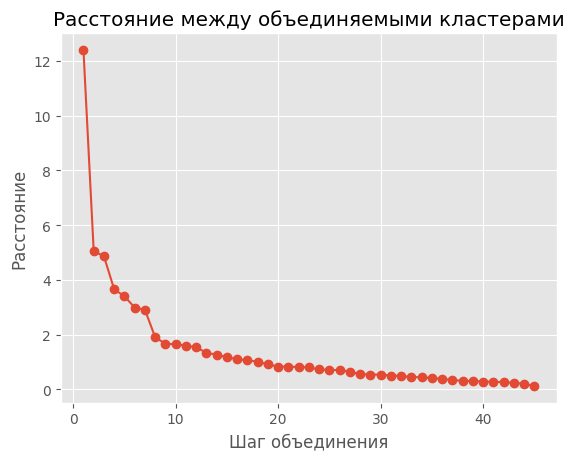

In [102]:
dist = link[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

In [103]:
dist

array([ 0.13000932,  0.20992596,  0.24101549,  0.26638013,  0.27962161,
        0.28619313,  0.31145704,  0.31305006,  0.3489377 ,  0.38756772,
        0.419298  ,  0.44645167,  0.45306282,  0.4905399 ,  0.50930475,
        0.54142314,  0.54694673,  0.55560294,  0.6525312 ,  0.70695573,
        0.71322146,  0.73106836,  0.80923253,  0.81996004,  0.83440954,
        0.83591396,  0.92010068,  1.00797757,  1.07317494,  1.09798639,
        1.18557963,  1.2661125 ,  1.34552527,  1.5346713 ,  1.60218207,
        1.65009621,  1.67120837,  1.9067302 ,  2.91093293,  2.99369803,
        3.40166518,  3.65965497,  4.85967779,  5.06109685, 12.40027153])

In [104]:
dist = dist[25:]

Text(0, 0.5, 'Расстояние')

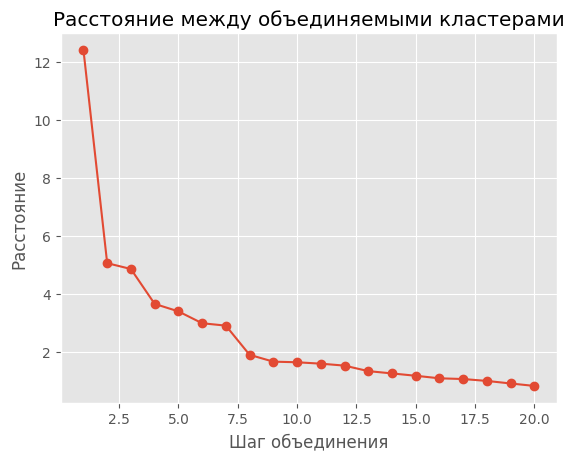

In [105]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

In [106]:
df['cluster'] = fcluster(link, 4, criterion='distance')
df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,1780.500000,108.550000,71.300000
2,1792.000000,77.526316,55.157895
3,1798.857143,50.942857,19.214286
4,2082.357143,53.121429,14.914286


Снизим размерность пространства признаков для визуализации полученного разбиения на кластеры.

In [107]:
fa = FactorAnalysis(n_components=2)
fa.fit(X)

pd.DataFrame(fa.components_, columns=X.columns)

,Work,Price,Salary
0,-0.512495,0.894643,0.896575
1,0.227699,0.026448,0.011471


In [108]:
scores = pd.DataFrame(fa.transform(X), columns=['factor1', 'factor2'])
scores.head()

,factor1,factor2
0,0.161083,-0.301194
1,-0.503297,-0.271133
2,-1.394532,0.237597
3,-1.640111,0.001665
4,0.376472,-0.261201


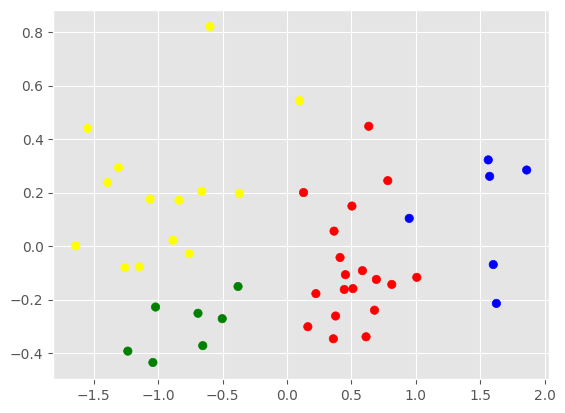

In [109]:
scores['cluster'] = fcluster(link, 4, criterion='distance')

plt.scatter(scores['factor1'], scores['factor2'], 
            color=scores['cluster'].map({1: 'blue', 2: 'red', 3: 'green', 4: 'yellow'}))
plt.show()

In [110]:
df[df['cluster']==1]

,Work,Price,Salary,cluster
City,,,,
Geneva,1880,95.9,90.3,1
Helsinki,1667,113.6,66.6,1
Oslo,1583,115.5,63.7,1
Stockholm,1805,111.3,39.2,1
Tokyo,1880,115.0,68.0,1
Zurich,1868,100.0,100.0,1


In [111]:
df[df['cluster']==2]

,Work,Price,Salary,cluster
City,,,,
Amsterdam,1714,65.6,49.0,2
Brussels,1708,73.8,50.5,2
Chicago,1924,73.9,61.9,2
Copenhagen,1717,91.3,62.9,2
Dublin,1759,76.0,41.4,2
Dusseldorf,1693,78.5,60.2,2
Frankfurt,1650,74.5,60.4,2
Houston,1978,71.9,46.3,2
London,1737,84.2,46.2,2


In [112]:
df[df['cluster']==3]

,Work,Price,Salary,cluster
City,,,,
Athens,1792,53.8,30.4,3
Lagos,1786,45.2,2.7,3
Lisbon,1742,56.2,18.8,3
Nicosia,1825,47.9,28.3,3
Rio_de_Janeiro,1749,46.3,10.5,3
San_Paulo,1856,48.9,11.1,3
Seoul,1842,58.3,32.7,3


In [113]:
df[df['cluster'] == 4]

,Work,Price,Salary,cluster
City,,,,
Bogota,2152,37.9,11.5,4
Bombay,2052,30.3,5.3,4
Buenos_Aires,1971,56.1,12.5,4
Caracas,2041,61.0,10.9,4
Hong_Kong,2375,63.8,27.8,4
Johannesburg,1945,51.1,24.0,4
Kuala_Lumpur,2167,43.5,9.9,4
Manila,2268,40.0,4.0,4
Mexico_City,1944,49.8,5.7,4


В первый кластер попали города с самым высоким уровнем жизни: работают меньше либо примерно столько же, как другие кластеры, при этом зарплата и цены выше. Второй и третий кластеры работают примерно одинаково, однако в третьем кластере зарплаты в 3 раза ниже относительно второго, а цены - в полтора. В четвёртом кластере самые бедные города, в которых работают больше всего относительно других кластеров, а зарплаты самые низкие.

### Кластеризация методом k-средних (k-means)

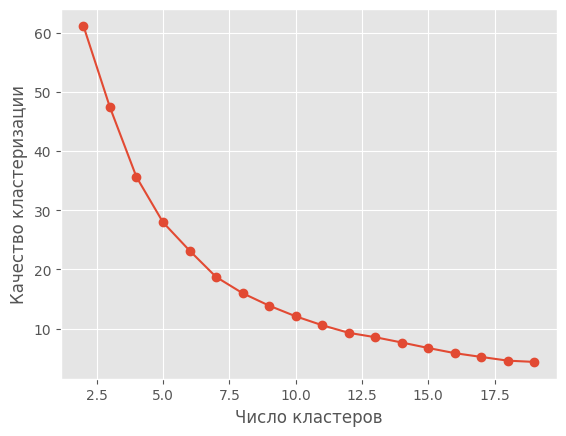

In [114]:
K = range(2, 20)
models = [KMeans(n_clusters=k, random_state=42, max_iter=300, n_init=10, verbose=0, tol=0.0001).fit(X) for k in K]
dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Качество кластеризации')

plt.show()

Начиная с 5 скорость убывания графика снижается.

In [115]:
model = KMeans(n_clusters=5, random_state=42, max_iter=300, n_init=10, verbose=0, tol=0.0001)
model.fit(X)

df['cluster_2'] = model.labels_

In [116]:
df[["Work", "Price", "Salary", "cluster_2"]].groupby('cluster_2').mean()

,Work,Price,Salary
cluster_2,,,
0,1732.000000,78.135714,53.614286
1,2182.000000,44.116667,12.050000
2,1893.428571,53.664286,16.892857
3,1780.500000,108.550000,71.300000
4,1990.833333,77.233333,55.316667


In [117]:
df.groupby('cluster_2').size()

cluster_2
0    14
1     6
2    14
3     6
4     6
dtype: int64

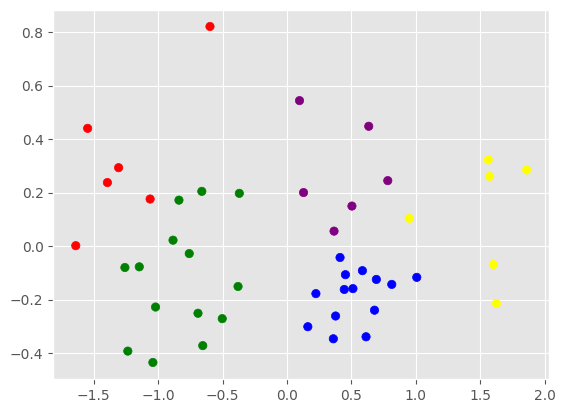

In [118]:
scores['cluster_2'] = model.labels_
plt.scatter(scores['factor1'], scores['factor2'], 
            color=scores['cluster_2'].map({0: 'blue', 1: 'red', 2: 'green', 3: 'yellow', 4: 'purple'}))
plt.show()

In [119]:
df[["Work", "Price", "Salary", "cluster_2"]][df['cluster_2'] == 1]

,Work,Price,Salary,cluster_2
City,,,,
Bogota,2152,37.9,11.5,1
Bombay,2052,30.3,5.3,1
Hong_Kong,2375,63.8,27.8,1
Kuala_Lumpur,2167,43.5,9.9,1
Manila,2268,40.0,4.0,1
Panama,2078,49.2,13.8,1


In [120]:
df[["Work", "Price", "Salary", "cluster_2"]][df['cluster_2'] == 2]

,Work,Price,Salary,cluster_2
City,,,,
Athens,1792,53.8,30.4,2
Buenos_Aires,1971,56.1,12.5,2
Caracas,2041,61.0,10.9,2
Johannesburg,1945,51.1,24.0,2
Lagos,1786,45.2,2.7,2
Lisbon,1742,56.2,18.8,2
Mexico_City,1944,49.8,5.7,2
Nairobi,1958,45.0,5.8,2
Nicosia,1825,47.9,28.3,2


При разбиении на 5 кластеров первый и второй мало отличаются по значениям признаков => количество кластеров лучше уменьшить.

In [208]:
model = KMeans(n_clusters=4, random_state=42, max_iter=300, n_init=10, verbose=0, tol=0.0001)
model.fit(X)

df['cluster_2'] = model.labels_

df[["Work", "Price", "Salary", "cluster_2"]].groupby('cluster_2').mean()

,Work,Price,Salary
cluster_2,,,
0,2133.500000,54.170000,16.080000
1,1801.235294,75.758824,55.005882
2,1763.750000,104.550000,67.587500
3,1855.454545,50.781818,16.590909


In [124]:
df['cluster_2'].sort_values()

City
Kuala_Lumpur      0
Bogota            0
Bombay            0
Tel_Aviv          0
Taipei            0
Caracas           0
Singpore          0
Manila            0
Panama            0
Hong_Kong         0
Amsterdam         1
Vienna            1
Milan             1
Paris             1
New_York          1
Los_Angeles       1
Sydney            1
Toronto           1
Montreal          1
London            1
Luxembourg        1
Dublin            1
Brussels          1
Houston           1
Chicago           1
Dusseldorf        1
Frankfurt         1
Tokyo             2
Stockholm         2
Copenhagen        2
Oslo              2
Zurich            2
Geneva            2
Helsinki          2
Madrid            2
Nairobi           3
Lisbon            3
Rio_de_Janeiro    3
San_Paulo         3
Seoul             3
Mexico_City       3
Buenos_Aires      3
Johannesburg      3
Athens            3
Nicosia           3
Lagos             3
Name: cluster_2, dtype: int32

Сравним разбиения, полученные двумя методами.

In [209]:
res_ = pd.DataFrame()

res_['ierarh']  = fcluster(link, 4, criterion='distance')
res_['kmeans']  = model.labels_

In [210]:
tab = pd.crosstab(res_['ierarh'], res_['kmeans'])
tab

kmeans,0,1,2,3
ierarh,,,,
1,0,0,6,0
2,0,17,2,0
3,0,0,0,7
4,10,0,0,4


###  Метод DBSCAN

In [133]:
dbscan_1 = DBSCAN()
dbscan_1.fit(X)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1 36]
 [ 0 10]]


Кластеризация со значениями по умолчанию большинство наблюдений определила в выбросы. Попробуем подобрать значения ```eps``` и ```min_samples``` получше.

In [156]:
dbscan_1 = DBSCAN(eps=0.7, metric='euclidean', min_samples=4)
dbscan_1.fit(X)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1 11]
 [ 0 17]
 [ 1  4]
 [ 2 14]]


In [157]:
df['cluster_3'] = dbscan_1.labels_

df[["Work", "Price", "Salary", "cluster_3"]].groupby('cluster_3').mean()

,Work,Price,Salary
cluster_3,,,
-1,1936.454545,89.218182,55.172727
0,1764.823529,77.723529,55.088235
1,1800.250000,54.050000,27.550000
2,1998.000000,50.407143,11.821429


In [179]:
dbscan_1 = DBSCAN(eps=0.8, metric='euclidean', min_samples=2)
dbscan_1.fit(X)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  4]
 [ 0 19]
 [ 1 19]
 [ 2  2]
 [ 3  2]]


In [180]:
df['cluster_3'] = dbscan_1.labels_

df[["Work", "Price", "Salary", "cluster_3"]].groupby('cluster_3').mean()

,Work,Price,Salary
cluster_3,,,
-1,2051.250000,93.600000,42.375000
0,1792.000000,77.526316,55.157895
1,1959.210526,50.115789,14.789474
2,1874.000000,97.950000,95.150000
3,1625.000000,114.550000,65.150000


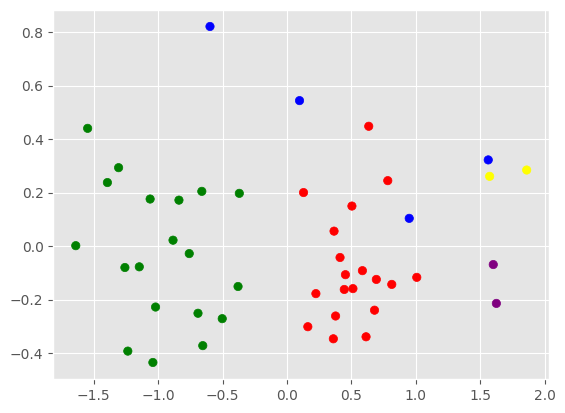

In [181]:
scores['cluster_3'] = dbscan_1.labels_
plt.scatter(scores['factor1'], scores['factor2'], 
            color=scores['cluster_3'].map({-1: 'blue', 0: 'red', 1: 'green', 2: 'yellow', 3: 'purple'}))
plt.show()

In [200]:
dbscan_1 = DBSCAN(eps=0.8, metric='euclidean', min_samples=3)
dbscan_1.fit(X)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  8]
 [ 0 19]
 [ 1 19]]


In [201]:
df['cluster_3'] = dbscan_1.labels_

df[["Work", "Price", "Salary", "cluster_3"]].groupby('cluster_3').mean()

,Work,Price,Salary
cluster_3,,,
-1,1900.375000,99.925000,61.262500
0,1792.000000,77.526316,55.157895
1,1959.210526,50.115789,14.789474


В результате получилось два кластера и восемь выбросов.

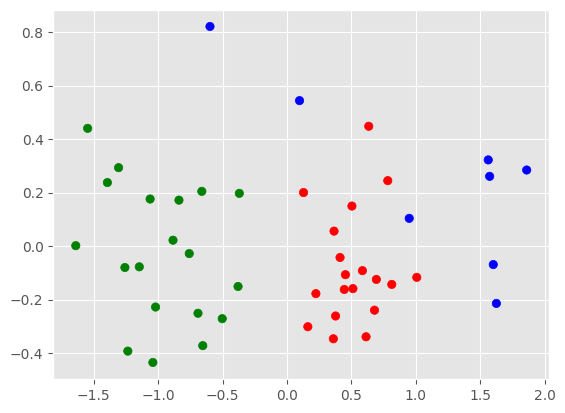

In [213]:
scores['cluster_3'] = dbscan_1.labels_
plt.scatter(scores['factor1'], scores['factor2'], color=scores['cluster_3'].map({-1: 'blue', 0: 'red', 1: 'green'}))
plt.show()

In [211]:
df[["Work", "Price", "Salary", "cluster_3"]][df['cluster_3'] == -1]

,Work,Price,Salary,cluster_3
City,,,,
Geneva,1880,95.9,90.3,-1
Helsinki,1667,113.6,66.6,-1
Hong_Kong,2375,63.8,27.8,-1
Oslo,1583,115.5,63.7,-1
Stockholm,1805,111.3,39.2,-1
Taipei,2145,84.3,34.5,-1
Tokyo,1880,115.0,68.0,-1
Zurich,1868,100.0,100.0,-1


In [214]:
df[["Work", "Price", "Salary", "cluster_3"]][df['cluster_3'] == 0]

,Work,Price,Salary,cluster_3
City,,,,
Amsterdam,1714,65.6,49.0,0
Brussels,1708,73.8,50.5,0
Chicago,1924,73.9,61.9,0
Copenhagen,1717,91.3,62.9,0
Dublin,1759,76.0,41.4,0
Dusseldorf,1693,78.5,60.2,0
Frankfurt,1650,74.5,60.4,0
Houston,1978,71.9,46.3,0
London,1737,84.2,46.2,0


In [215]:
df[["Work", "Price", "Salary", "cluster_3"]][df['cluster_3'] == 1]

,Work,Price,Salary,cluster_3
City,,,,
Athens,1792,53.8,30.4,1
Bogota,2152,37.9,11.5,1
Bombay,2052,30.3,5.3,1
Buenos_Aires,1971,56.1,12.5,1
Caracas,2041,61.0,10.9,1
Johannesburg,1945,51.1,24.0,1
Kuala_Lumpur,2167,43.5,9.9,1
Lagos,1786,45.2,2.7,1
Lisbon,1742,56.2,18.8,1


В выбросы попали самые дорогие города, а два кластера представляют собой разделение на более развитые экономические города и менее развитые.

Сравним результаты с иерархическим и k-means:

In [216]:
res_['dbscan'] = dbscan_1.labels_

In [218]:
tab = pd.crosstab(res_['ierarh'], res_['dbscan'])
tab

dbscan,-1,0,1
ierarh,,,
1,6,0,0
2,0,19,0
3,0,0,7
4,2,0,12


In [219]:
tab = pd.crosstab(res_['kmeans'], res_['dbscan'])
tab

dbscan,-1,0,1
kmeans,,,
0,2,0,8
1,0,17,0
2,6,2,0
3,0,0,11
